In [1]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

22388


In [2]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
_font_size = 7.5

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [12]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print(postanalysis_folder)
dark_mode = True
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0903_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)

comp_figure_folder = os.path.join(figure_folder, 'AB_compartment')

if not os.path.exists(comp_figure_folder):
    print(f"Create: {comp_figure_folder}")
    os.makedirs(comp_figure_folder)
else:
    print(f"Use: {comp_figure_folder}")

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark
Use: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\AB_compartment


In [4]:
# load contact matrix
ensemble_contact_filename = os.path.join(postanalysis_folder, 'ensemble_contactDict_600.pkl')
print(ensemble_contact_filename)
ensemble_contactDict = np.load(ensemble_contact_filename, allow_pickle=True)

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\ensemble_contactDict_600.pkl


## load codebook

In [10]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)


In [6]:
from ImageAnalysis3.structure_tools import distance
ensemble_contact_mat, _chr_edges, _chr_names = distance.assemble_ChrDistDict_2_Matrix(
    ensemble_contactDict, codebook, use_cis=False, use_trans=False, sort_by_region=False)

In [7]:
ensemble_normedPC1_filename = os.path.join(postanalysis_folder, 'ensemble_pc1.npy')
ensemble_normedPC1 = np.load(ensemble_normedPC1_filename)

# Plot ensemble contacts vs AB calling

In [8]:
# define AB
ensemble_AB_dict = {}
AB_th = -0.5
ensemble_AB_dict['A'] = np.where(ensemble_normedPC1 > AB_th)[0]
ensemble_AB_dict['B'] = np.where(ensemble_normedPC1 <= AB_th)[0]

In [13]:
left_chr, right_chr = '6', '8'

<IPython.core.display.Javascript object>


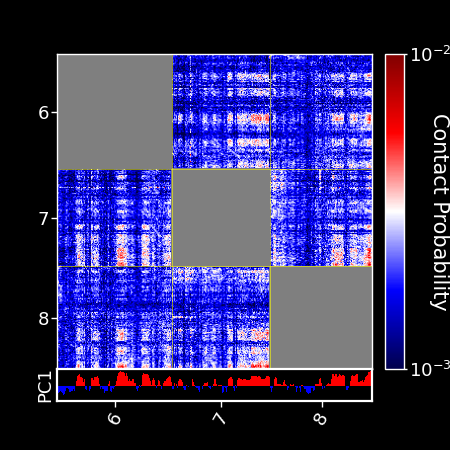

In [17]:
%matplotlib notebook
#plt.style.use('default')

from matplotlib import cm
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

#plt.style.use('dark_background')

fig, ax1 = plt.subplots(figsize=(_single_col_width,_single_col_width), dpi=200)

# create a color map
current_cmap = cm.get_cmap('seismic').copy()
current_cmap.set_bad(color=[0.5,0.5,0.5,1])

vmin,vmax = 1e-3, 1e-2

_pf = ax1.imshow(ensemble_contact_mat, 
                 cmap=current_cmap, norm=LogNorm(vmin=vmin, vmax=vmax, ))

ax1.set_yticks( (_chr_edges[1:] + _chr_edges[:-1])[:-1] / 2 ,)
ax1.set_yticklabels(_chr_names[:-1],)

ax1.hlines(_chr_edges-0.5, 0, len(ensemble_contact_mat), color='yellow', linewidth=0.2)
ax1.vlines(_chr_edges-0.5, 0, len(ensemble_contact_mat), color='yellow', linewidth=0.2)
ax1.xaxis.set_tick_params(which='both', labelbottom=True)
ax1.yaxis.set_tick_params(which='both', labelleft=True)
ax1.set_xlim([0, len(ensemble_contact_mat)])
ax1.set_ylim([len(ensemble_contact_mat), 0])

ax1.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=True, labelbottom=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in ax1.spines.items()]

# locate ax1
divider = make_axes_locatable(ax1)
# colorbar ax
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf,cax=cax, ax=ax1)
cbar.ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]

cbar.set_ticks([vmin,vmax])
cbar.outline.set_linewidth(_ticklabel_width)
cbar.set_label('Contact Probability', 
               fontsize=_font_size, labelpad=-1, rotation=270)
cbar.ax.minorticks_off()

# create bottom ax
bot_ax = divider.append_axes('bottom', size='10%', pad="0%", 
                             sharex=ax1, xticks=[])
bot_ax.bar(ensemble_AB_dict['A'], ensemble_normedPC1[ensemble_AB_dict['A']]-AB_th, 
           color='r',width=1, bottom=0)
bot_ax.bar(ensemble_AB_dict['B'], ensemble_normedPC1[ensemble_AB_dict['B']]-AB_th, 
           color='b',width=1, bottom=0)

bot_ax.set_xticks((_chr_edges[1:] + _chr_edges[:-1])[:-1]/2,)
bot_ax.set_xticklabels(_chr_names[:-1], rotation=60)
bot_ax.tick_params('x', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
bot_ax.tick_params('y', labelsize=_font_size-1, 
                width=_ticklabel_width, length=0,
                pad=1, labelleft=False, labelbottom=True) # remove bottom ticklabels for ax1
bot_ax.set_ylabel('PC1', fontsize=_font_size-1, labelpad=1)
#bot_ax.set_ylim([-10,10])
#bot_ax.set_yticks([0.5,-0.5])
#bot_ax.set_yticklabels(["A","B"])
plt.savefig(os.path.join(comp_figure_folder, f"trans_ensemble_contact_AB.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.savefig(os.path.join(comp_figure_folder, f"trans_ensemble_contact_AB.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
# left right chr
ax1.set_xlim([chr_2_indices[left_chr].min(), chr_2_indices[right_chr].max()])
ax1.set_ylim([chr_2_indices[right_chr].max(), chr_2_indices[left_chr].min()])

plt.savefig(os.path.join(comp_figure_folder, f"trans_ensemble_contact_AB_{left_chr}-{right_chr}.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.savefig(os.path.join(comp_figure_folder, f"trans_ensemble_contact_AB_{left_chr}-{right_chr}.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()


# Plot PC1 from different cell types

In [15]:
# load subclass
subclass_2_normedPC1_df_filename = os.path.join(postanalysis_folder, 'subclass_2_normedPC1.csv')

pc1_df = pd.read_csv(subclass_2_normedPC1_df_filename)

<IPython.core.display.Javascript object>


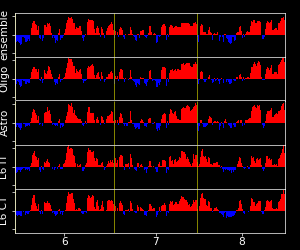

In [18]:
nonNeu_subclasses = ['ensemble', 'Oligo','Astro','Micro', 'OPC']
sel_subclasses = ['ensemble','Oligo','Astro','L6 IT', 'L6 CT']
ITNeu_subclasses = ["ensemble", "L2/3 IT", 'L4/5 IT', 'L5 IT', 'L6 IT']
im_size = 0.5

test_AB_th = -0.5 
sel_subclasses = sel_subclasses

num_x = len(sel_subclasses)
fig, axes = plt.subplots(num_x, 1, figsize=(im_size*6,num_x*im_size), 
                         sharex=True, sharey=True, dpi=100)
for _i, _subclass in enumerate(sel_subclasses):
    _normedPC1 = pc1_df[_subclass]
    _ax = axes[_i]
    _ax.vlines(_chr_edges-0.5, -3, 3, color='y', linewidth=0.5)
    _subclass_A = np.where(_normedPC1 >= test_AB_th)[0]
    _subclass_B = np.where(_normedPC1 < test_AB_th)[0]
    # bar
    _ax.bar(_subclass_A, _normedPC1[_subclass_A]-test_AB_th, color='r',width=1, bottom=0)
    _ax.bar(_subclass_B, _normedPC1[_subclass_B]-test_AB_th, color='b',width=1, bottom=0)
    _ax.set_ylabel(f"{_subclass}", fontsize=_font_size)
    _ax.tick_params('both', labelsize=_font_size, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=False,
                    pad=1, ) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in _ax.spines.items()]

# set axes
_ax.set_ylim([-3,3])
_ax.set_xlim([-0.5, len(pc1_df)+0.5])
_ax.set_xticks((_chr_edges[1:] + _chr_edges[:-1])[:-1]/2,)
_ax.set_xticklabels(_chr_names[:-1],)


_ax.set_xlim([chr_2_indices[left_chr].min(), chr_2_indices[right_chr].max()])

fig.subplots_adjust(wspace=0.1, hspace=0., left=0.05, right=0.95, top=0.95, bottom=0.07)
fig.savefig(os.path.join(comp_figure_folder, f"subclass_sel_pc1_{left_chr}-{right_chr}.pdf"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
fig.savefig(os.path.join(comp_figure_folder, f"subclass_sel_pc1_{left_chr}-{right_chr}.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
plt.show()

# plot example cell AB

## load trans-ab ratio

In [19]:
gaussian_radius = 0.5

In [20]:
subclass_2_chr2Zxys_filename = os.path.join(postanalysis_folder, 'subclass_2_chr2Zxys.pkl')
subclass_2_chr2ZxysList = pickle.load(open(subclass_2_chr2Zxys_filename, 'rb'))

In [21]:
transABratio_ensemble_filename = os.path.join(postanalysis_folder, f'transABRatio_ensembleAB_notNorm_r{gaussian_radius}.pkl')
print(transABratio_ensemble_filename)
subclass_2_transABRatioDicts = pickle.load(open(transABratio_ensemble_filename, 'rb'))

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\transABRatio_ensembleAB_notNorm_r0.5.pkl


In [22]:
sel_subclass = 'L2/3 IT'
sel_cell_indices = []
for _cell_index, _chr2Zxys in enumerate(subclass_2_chr2ZxysList[sel_subclass]):
    if len(_chr2Zxys) >= 20:
        sel_cell_indices.append(_cell_index)


In [23]:
import ImageAnalysis3.figure_tools.plot_decode
reload(ia.figure_tools.plot_decode)
from ImageAnalysis3.figure_tools.plot_decode import Centering_Chr2ZxysListDict, summarize_chr2Zxys

In [30]:
_sel_cell_ind = sel_cell_indices[1]
_chr2Zxys = subclass_2_chr2ZxysList[sel_subclass][_sel_cell_ind]
_centered_chr2Zxys = Centering_Chr2ZxysListDict(_chr2Zxys)
_chr2transABratios = subclass_2_transABRatioDicts[sel_subclass][_sel_cell_ind]
_cell_zxys, _cell_rids = summarize_chr2Zxys(_centered_chr2Zxys, codebook, keep_valid=True)
_cell_transABratios, _ = summarize_chr2Zxys(_chr2transABratios, codebook, keep_valid=True)


In [31]:
_slice_flags = (_cell_zxys[:,0] >= -1) & (_cell_zxys[:,0] < 1) 

In [32]:
AB_vector = np.zeros(len(codebook))
AB_vector[ensemble_AB_dict['A']] = 1
AB_vector[ensemble_AB_dict['B']] = -1

In [33]:
_pf = ax.scatter(_cell_zxys[_slice_flags,1], _cell_zxys[_slice_flags,2], 
                 c=AB_vector[_cell_rids[_slice_flags]], s=1, cmap='bwr', vmin=-1,vmax=1)
ax.set_aspect('equal')
ax.patch.set_color('black')
ax.tick_params('both', labelsize=_font_size-1, 
                width=0, length=0,
                pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

cbar = plt.colorbar(_pf, ax=ax, ticks=[-1,1])
cbar.ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]
cbar.set_label('$\it{trans}$-A/B ratio', 
               fontsize=_font_size, labelpad=-1, rotation=270)
cbar.ax.set_yticklabels(['B','A'])

[Text(1, -1, 'B'), Text(1, 1, 'A')]

<IPython.core.display.Javascript object>


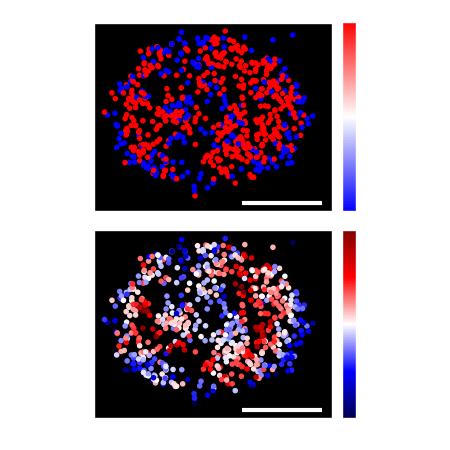

In [34]:
fig, axes = plt.subplots(2,1, figsize=(_single_col_width,_single_col_width), dpi=200, sharex=True, sharey=True)
fig.set_facecolor((1,1,1,0))
ref_bar_len = 5

ax = axes[0]
ax.set_facecolor([0,0,0])
_pf = ax.scatter(_cell_zxys[_slice_flags,2], _cell_zxys[_slice_flags,1], 
                 c=AB_vector[_cell_rids[_slice_flags]], s=1, cmap='bwr', vmin=-1,vmax=1)
ax.set_aspect('equal')
ax.patch.set_color('black')
ax.tick_params('both', labelsize=_font_size-1, 
                width=0, length=0,
                pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf, ax=ax, ticks=[-1,1], cax=cax)
cbar.ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]
cbar.set_label('Compartment', 
               fontsize=_font_size, labelpad=1, rotation=270)
cbar.ax.set_yticklabels(['B','A'])

# right
ax = axes[1]
ax.set_facecolor([0,0,0])
_pf = ax.scatter(_cell_zxys[_slice_flags,2], _cell_zxys[_slice_flags,1], 
                 c=_cell_transABratios[_slice_flags], s=1, cmap='seismic', vmin=-2,vmax=4)
ax.set_aspect('equal')
ax.patch.set_color('black')
ax.tick_params('both', labelsize=_font_size-1, 
                width=0, length=0,
                pad=1, labelleft=False, labelbottom=False) # remove bottom ticklabels for ax
[i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]

ymin,ymax = ax.get_ylim()
xmin,xmax = ax.get_xlim()

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='6%', pad="4%")
cbar = plt.colorbar(_pf, ax=ax, cax=cax, ticks=[-2,4])
cbar.ax.tick_params('both', labelsize=_font_size-1, 
                width=_ticklabel_width, length=_ticklabel_size-1,
                pad=1, labelleft=False) # remove bottom ticklabels for ax1
[i[1].set_linewidth(_ticklabel_width) for i in cbar.ax.spines.items()]
cbar.set_label('$\it{trans}$-A/B ratio', 
               fontsize=_font_size, labelpad=-1, rotation=270)

# ref bar
axes[0].hlines(ymin+0.1, xmax-ref_bar_len-0.1, xmax-0.1, color=1-np.array(ax.get_facecolor())[:3])
axes[1].hlines(ymin+0.1, xmax-ref_bar_len-0.1, xmax-0.1, color=1-np.array(ax.get_facecolor())[:3])

# locate ax1

fig.subplots_adjust(wspace=0.0, hspace=0.1, left=0.05, right=0.95, top=0.95, bottom=0.07)
fig.savefig(os.path.join(comp_figure_folder, f"example_2d_transAB.pdf"),
            transparent=False, bbox_inches='tight', pad_inches=0.1, dpi=300, 
            facecolor=fig.get_facecolor(), edgecolor='none')
fig.savefig(os.path.join(comp_figure_folder, f"example_2d_transAB.png"),
            transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300, 
            facecolor=fig.get_facecolor(), edgecolor='none')
plt.show()